In [1]:
# Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
# load and review data

In [4]:
df=pd.read_csv("credit_card.csv")

In [5]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [6]:
df.shape  

(8950, 18)

In [7]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
# Separate categorical and numerical columns

In [9]:
cat_col=df.select_dtypes(include='O').columns
num_col=df.select_dtypes(exclude='O').columns

In [10]:
print("categorical_columns :",cat_col) #categorical columns

categorical_columns : Index(['CUST_ID'], dtype='object')


In [11]:
print("Numerical_columns :",num_col) #Numerical columns

Numerical_columns : Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [14]:
# drop cust_id column since it is unique for each datapoint 
df.drop('CUST_ID',axis = 1,inplace = True)


### Q1. What does the primary analysis of several categorical features reveal?

### a) Missing Values Analysis

In [15]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:>

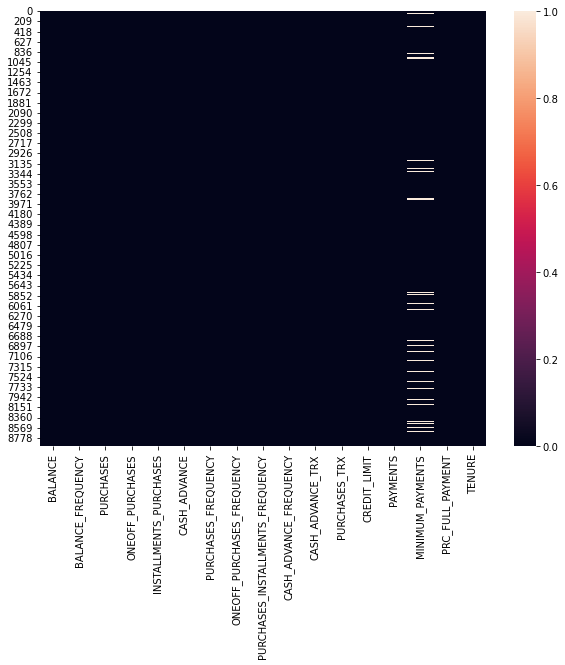

In [16]:
# heat map
plt.figure(figsize = (10,8))
sns.heatmap(df.isna())

In [17]:
# There are 313 missing values in MINIMUM_PAYMENTS and 1 missing valu in CREDIT_LIMIT

In [18]:
# Treating the missing values

In [19]:
df['CREDIT_LIMIT'].fillna(round(df['CREDIT_LIMIT'].mean()),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(round(df['MINIMUM_PAYMENTS'].mean()),inplace=True)

### b)Outliers treatment using Z score method

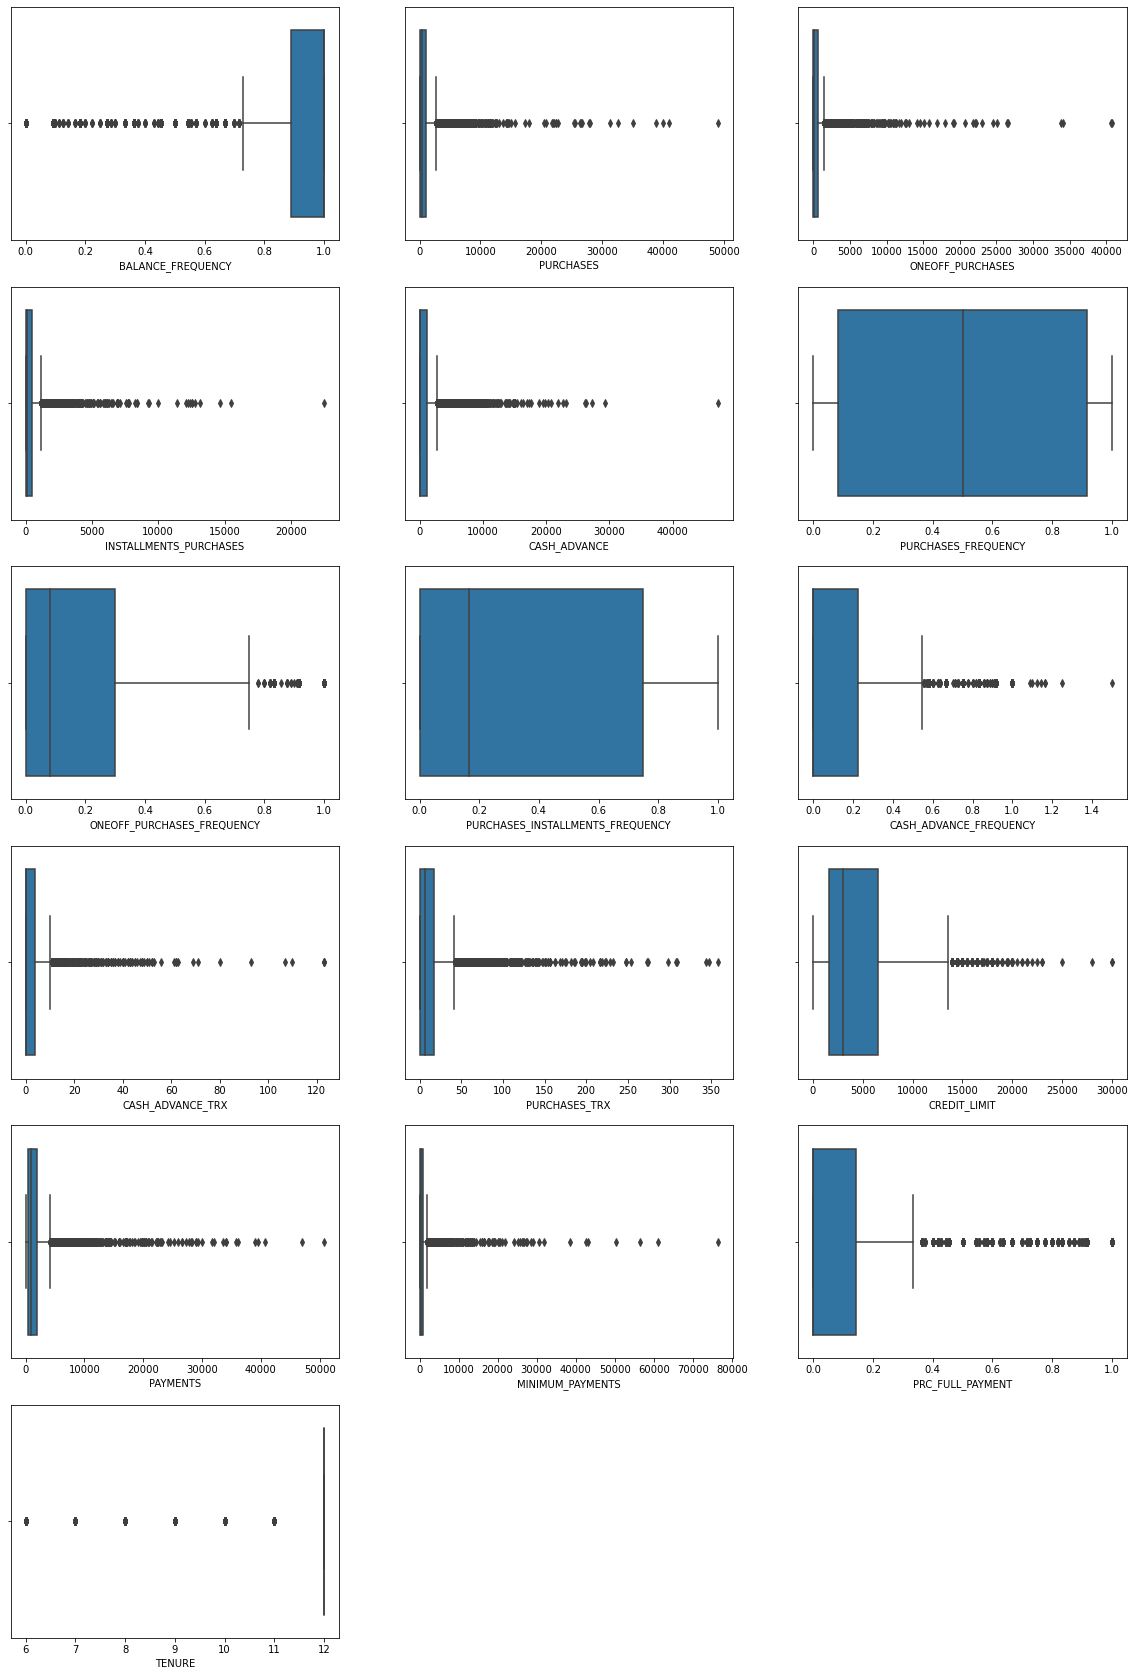

In [20]:
# visualize outliers for each column
a=df.columns
plt.figure(figsize = (20,30))
for i in range(1, 17):
    plt.subplot(6, 3, i)
    sns.boxplot(x = a[i], data = df)

In [21]:
# using Z score to filter outliers and remove them from the dataset
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

### c) Deal with correlated variables

In [22]:
# We are going to drop a featur if it has multicolinearity
# i.e, corr btw independent variables
# drop if greater than 80%

In [23]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
df = df.drop(columns=to_drop, axis=1)
df

C:\Users\91988\AppData\Local\Temp/ipykernel_10776/618211414.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.000000,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,0.00,169.554775,0.500000,0.500000,0.125000,7,500.0,98.225317,113.944625,0.000000,8
8877,55.147722,0.875000,163.31,163.31,0.000000,0.875000,0.000000,0.000000,7,1000.0,62.619008,109.580539,0.000000,8
8878,869.328293,0.750000,0.00,0.00,1153.925205,0.000000,0.000000,0.125000,0,1200.0,150.755024,337.986933,0.000000,8
8879,137.744895,1.000000,441.00,441.00,0.000000,0.750000,0.000000,0.000000,6,1000.0,169.249683,124.639905,0.000000,8


<AxesSubplot:>

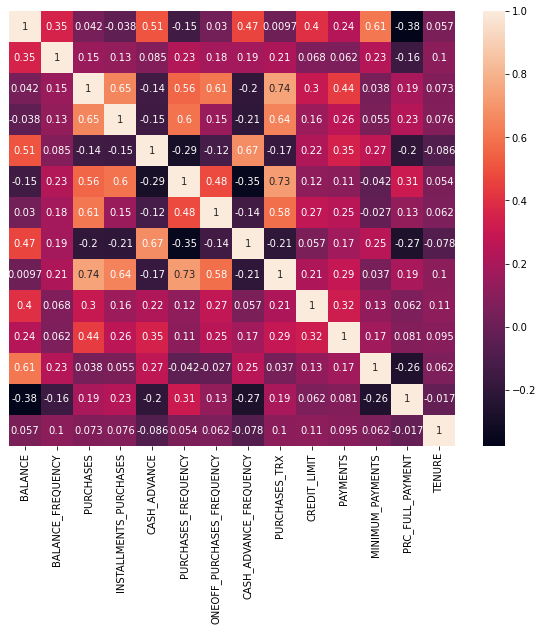

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),yticklabels=False,annot=True)

### Q3) Perform Dimensionality reduction using PCA

In [25]:
from sklearn.decomposition import PCA

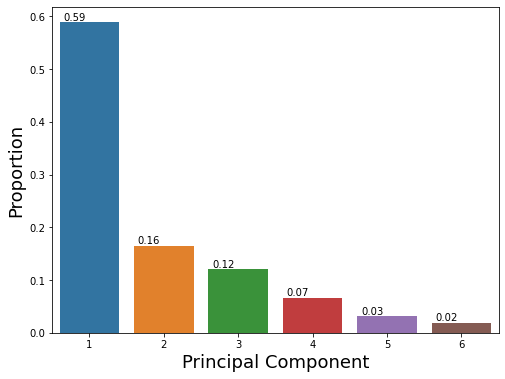

In [26]:
sk_pca = PCA(n_components=6)
sk_pca.fit(df)
dset2 = pd.DataFrame()
dset2['pca'] = range(1,7)
dset2['vari'] = pd.DataFrame(sk_pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
graph = sns.barplot(x='pca', y='vari', data=dset2)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Principal Component', fontsize=18)
plt.show()

C:\Users\91988\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


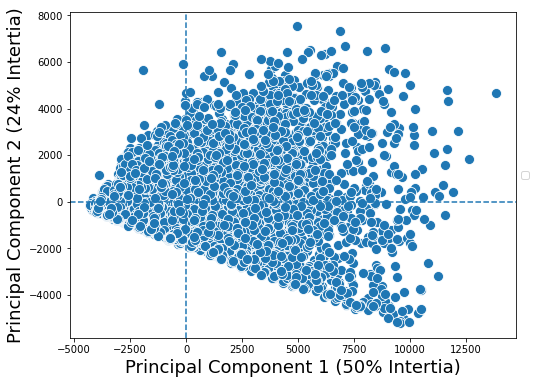

In [27]:
x_pca = sk_pca.transform(df[df.columns])

plt.figure(figsize=(8,6)) 
sns.scatterplot(x_pca[:,0],x_pca[:,1], 
                palette="Set1", legend='full', s=100).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Principal Component 1 (50% Intertia)',fontsize=18)
plt.ylabel('Principal Component 2 (24% Intertia)', fontsize=18)
plt.axvline(0, ls='--') 
plt.axhline(0, ls='--') 
plt.show()

### K means Clustering model

In [28]:
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.000000,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.000000,8,1800.0,1400.057770,2407.246035,0.000000,12
7,1823.652743,1.000000,436.20,436.20,0.000000,1.000000,0.000000,0.000000,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,200.00,0.000000,0.333333,0.083333,0.000000,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,3,11000.0,1164.770591,100.302262,0.000000,12
10,1293.124939,1.000000,920.12,920.12,0.000000,1.000000,0.000000,0.000000,12,1200.0,1083.301007,2172.697765,0.000000,12


In [29]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit_transform(df)

### Q4) Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

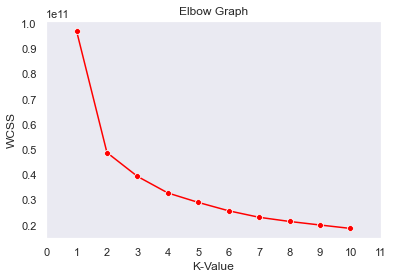

In [30]:
sns.set(style="darkgrid")
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="random", random_state = 42)
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

### Q5) Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[2,3,4,5,6,7,8]
for k in n_clusters:
    cluster=KMeans(n_clusters=k , random_state=0)
    predict=cluster.fit_predict(df)
    
    score=silhouette_score(df , predict , random_state=0)
    print('for n_clusters={} , silhoutte score is {}'.format(k, score))

for n_clusters=2 , silhoutte score is 0.4521131625358664
for n_clusters=3 , silhoutte score is 0.43852974612301515
for n_clusters=4 , silhoutte score is 0.3605501004917412
for n_clusters=5 , silhoutte score is 0.3562657869148566
for n_clusters=6 , silhoutte score is 0.3274258710460645
for n_clusters=7 , silhoutte score is 0.32979793027838405
for n_clusters=8 , silhoutte score is 0.2573315430431648


### optimal K value = 4

In [32]:
# building a K-Means model for K = 4
model = KMeans(n_clusters= 2, random_state=0)

# fit the model
predict=model.fit_predict(df)
score=silhouette_score(df , predict , random_state=0)
print('silhoutte score is {}'.format(score))

silhoutte score is 0.4521131625358664


In [33]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)                

(array([0, 1]), array([2308, 5126], dtype=int64))

In [34]:
data_output = df.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.000000,0.000000,12,0
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,1


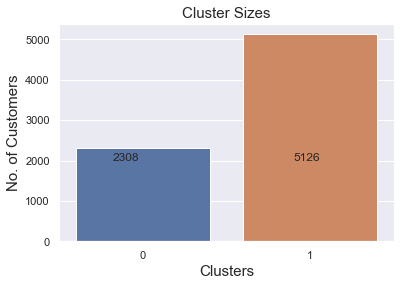

In [35]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])

plt.show()